In [1]:
import numpy as np

class OptionPricing:

    def __init__(self, S0, E, T, rf, sigma, iterations):
        self.S0 = S0
        self.E = E
        self.T = T
        self.rf = rf
        self.sigma = sigma
        self.iterations = iterations

    def call_option_simulation(self):
        # we have 2 columns: first with 0s the second column will store the payoff
        # we need the first column of 0s: payoff function is max(0,S-E) for call option
        option_data = np.zeros([self.iterations, 2])

        # dimensions: 1 dimensional array with as many items as the iterations
        rand = np.random.normal(0, 1, [1, self.iterations])

        # equation for the S(t) stock price at T
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2)
                                       + self.sigma * np.sqrt(self.T) * rand)

        # we need S-E because we have to calculate the max(S-E,0)
        option_data[:, 1] = stock_price - self.E

        # average for the Monte-Carlo simulation
        # max() returns the max(0,S-E) according to the formula
        # Note that this is the average value
        average = np.sum(np.amax(option_data, axis=1)) / float(self.iterations)

        # have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average

    def put_option_simulation(self):
        # we have 2 columns: first with 0s the second column will store the payoff
        # we need the first column of 0s: payoff function is max(0,S-E) for call option
        option_data = np.zeros([self.iterations, 2])

        # dimensions: 1 dimensional array with as many items as the iterations
        rand = np.random.normal(0, 1, [1, self.iterations])

        # equation for the S(t) stock price at T
        stock_price = self.S0 * np.exp(self.T * (self.rf - 0.5 * self.sigma ** 2)
                                       + self.sigma * np.sqrt(self.T) * rand)

        # we need S-E because we have to calculate the max(E-S,0)
        option_data[:, 1] = self.E - stock_price

        # average for the Monte-Carlo simulation
        # max() returns the max(0,S-E) according to the formula
        # THIS IS THE AVERAGE VALUE !!!
        average = np.sum(np.amax(option_data, axis=1)) / float(self.iterations)

        # have to use the exp(-rT) discount factor
        return np.exp(-1.0*self.rf*self.T)*average


if __name__ == '__main__':
    model = OptionPricing(100, 100, 1, 0.05, 0.2, 10000)
    print('Value of the call option is $%.2f' % model.call_option_simulation())
    print('Value of the put option is $%.2f' % model.put_option_simulation())


Value of the call option is $10.41
Value of the put option is $5.52


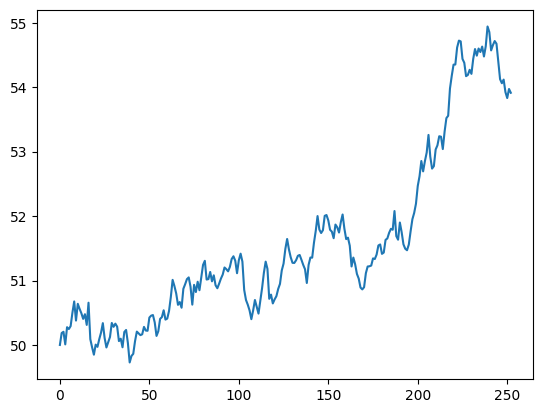

Prediction for future stock price: $53.91


C:\Users\E353682\AppData\Local\Temp\ipykernel_11204\4120343759.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Prediction for future stock price: $%.2f' % simulation_data['mean'].tail(1))


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUM_OF_SIMULATIONS = 10


def stock_monte_carlo(S0, mu, sigma, N=252):

    result = []

    # number of simulations - possible S(t) realizations (of the process)
    for _ in range(NUM_OF_SIMULATIONS):
        prices = [S0]
        for _ in range(N):
            # we simulate the change day by day (t=1)
            stock_price = prices[-1] * np.exp((mu - 0.5 * sigma ** 2) +
                                              sigma * np.random.normal())
            prices.append(stock_price)

        result.append(prices)

    simulation_data = pd.DataFrame(result)
    # the given columns will contain the time series for a given simulation
    simulation_data = simulation_data.T

    simulation_data['mean'] = simulation_data.mean(axis=1)

    plt.plot(simulation_data['mean'])
    plt.show()

    print('Prediction for future stock price: $%.2f' % simulation_data['mean'].tail(1))


if __name__ == '__main__':
    stock_monte_carlo(50, 0.0002, 0.01)


In [7]:
import numpy as np

def monte_carlo_sim(S0, K, T, r, sigma, num_simulations):
    # Generate random numbers for Monte Carlo simulation
    Z = np.random.standard_normal(num_simulations)
    S_T = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    # Calculate Payoffs
    call_payoffs = np.maximum(S_T - K, 0)  # European call option
    put_payoffs = np.maximum(K - S_T, 0)  # European put option
    # Discount payoffs to present value
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)

    return call_price, put_price

call_price, put_price = monte_carlo_sim(
    S0 = 100,  # Initial stock price
    K = 100,   # Strike price
    T = 1.0,  # Time to maturity (1 year)
    r = 0.05,  # Risk-free rate
    sigma = 0.2,  # Volatility
    num_simulations = 100000  # Number of Monte Carlo simulations
)

print(f'European Call Option Price: {call_price:.2f}')
print(f'European Put Option Price: {put_price:.2f}')

European Call Option Price: 10.42
European Put Option Price: 5.59


In [11]:
import numpy as np
from scipy.stats import norm

def black_scholes_greeks(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1) if option_type == 'call' else norm.cdf(d1) - 1
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = (- (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
             - r * K * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call'
             else - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
             + r * K * np.exp(-r * T) * si.norm.cdf(-d2))
    vega = S * np.sqrt(T) * norm.pdf(d1)
    rho = (K * T * np.exp(-r * T) * norm.cdf(d2) if option_type == 'call'
           else -K * T * np.exp(-r * T) * norm.cdf(-d2))

    return {'Delta': delta, 'Gamma': gamma, 'Theta': theta, 'Vega': vega, 'Rho': rho}

# Example:
S, K, T, r, sigma = 100, 100, 1, 0.05, 0.2  # Example parameters
greeks_call = black_scholes_greeks(S, K, T, r, sigma, 'call')
greeks_put = black_scholes_greeks(S, K, T, r, sigma, 'put')

print("Call Option Greeks:", greeks_call)
print("Put Option Greeks:", greeks_put)


Call Option Greeks: {'Delta': 0.6368306511756191, 'Gamma': 0.018762017345846895, 'Theta': -6.414027546438197, 'Vega': 37.52403469169379, 'Rho': 53.232481545376345}
Put Option Greeks: {'Delta': -0.3631693488243809, 'Gamma': 0.018762017345846895, 'Theta': -1.657880423934626, 'Vega': 37.52403469169379, 'Rho': -41.89046090469506}
